# Tic-tac-toe
play 20 times by three bot

### Logic part

In [76]:
import random
class Game():
    def __init__(self):
        self.board = []
        self.winner = None
        self.mode = None
        self.p1 = None
        self.p2 = None
        pass

    def make_empty_board(self):
        return [
            [None, None, None],
            [None, None, None],
            [None, None, None],
        ]

    def get_winner(self,board):
        """Determines the winner of the given board.
        Returns 'X', 'O', or None."""

        for i in range(3):
            verticle_flag = ''
            parrelle_flag = ''
            for j in range(3):
                verticle_flag = verticle_flag +str(board[i][j])
                parrelle_flag = parrelle_flag + str(board[j][i])
        
            if parrelle_flag  == "OOO" or verticle_flag == "OOO":
                return self.p1
            if parrelle_flag == "XXX" or verticle_flag == "XXX":
                return self.p2
            
        diagonal_flag = str(board[0][0])+str(board[1][1])+str(board[2][2])
        rdiagonal_flag = str(board[2][0])+str(board[1][1])+str(board[0][2])
        if diagonal_flag == "OOO" or rdiagonal_flag == "OOO":
            return self.p1
        if diagonal_flag == "XXX" or rdiagonal_flag == "XXX":
            return self.p2

        return None  
    
    def other_player(self,player):
        """Given the character for a player, returns the other player."""
        if player == "O":
            return "X"
        if player == "X":
            return "O"
    
    def check_draw(self):
        if (None in self.board[0]) or (None in self.board[1]) or (None in self.board[2]):
            return None
        else:
            return "Draw"
    def add_player(self,p1,p2):
        self.p1 = p1
        self.p2 = p2
    

class People(Game):
    def __init__(self,role):
        super().__init__()
        self.role = role

    def input_position(self,position,board):
        self.board = board
        self.board[int(position[1])-1][int(position[3])-1] = self.role
        return self.board

class Computer(Game):
    def __init__(self,role):
        super().__init__()
        self.role = role

    def input_position(self,board):
        self.board = board
        x = random.randint(0,2)
        y = random.randint(0,2)
        while self.board[x][y] != None:
             x = random.randint(0,2)
             y = random.randint(0,2)
        self.board[x][y] = self.role
        return self.board

In [67]:
def show_board(board):
    for i in range(3):
        print('|',end='')
        for j in range(3):
            if board[i][j]==None:
                print(' ',end= '|')
            else:
                print(board[i][j], end = '|')
        print("")
        print("-------")

def mode1(game,human,bot):
    winner = None
    game.board = game.make_empty_board()
    player = 'O'
    while winner == None:
        print('=====================')
        show_board(game.board)
        print("player "+ player + " turn")
       # player = game.other_player(player)
        position = input("please enter (rows,cols),i.e. (1,1),(3,3): ")
        while game.board[int(position[1])-1][int(position[3])-1]!=None:
            position = input("Please enter (rows,cols), you can not overlap! : ")
                
        game.board = human1.input_position(position,game.board) 
        
        show_board(game.board)   
        winner = game.get_winner(game.board)
        if winner != None:
            break

        game.board = bot.input_position(game.board) 
        winner = game.get_winner(game.board)   
   
        if None in game.board[0] or None in game.board[1] or None in game.board[2] :
            continue
        else:
            game.board = game.make_empty_board()
    print(winner+" is the winner")

def mode2(game,human1,human2):
    winner = None
    game.board = game.make_empty_board()
    while winner == None:
        show_board(game.board)
        print("player "+ human1.role + " turn")
        position = input("please enter (rows,cols),i.e. (1,1),(3,3): ")
        while game.board[int(position[1])-1][int(position[3])-1]!=None:
            position = input("Please enter (rows,cols), you can not overlap! : ")      
        game.board = human1.input_position(position,game.board) 
        show_board(game.board)   
        winner = game.get_winner(game.board)
        if winner != None:
            break
        show_board(game.board)
        print("player "+ human2.role + " turn")
        position = input("please enter (rows,cols),i.e. (1,1),(3,3): ")
        while game.board[int(position[1])-1][int(position[3])-1]!=None:
            position = input("Please enter (rows,cols), you can not overlap! : ")      
        game.board = human2.input_position(position,game.board) 
        show_board(game.board)   
        winner = game.get_winner(game.board)
 
   
        if None in game.board[0] or None in game.board[1] or None in game.board[2] :
            continue
        else:
            game.board = game.make_empty_board()
    show_board(game.board)
    print(winner+" is the winner")

def mode3(game,bot2,bot):
    winner = None
    game.board = game.make_empty_board()
    player = 'O'
    while winner == None:
        print('=====================')
        show_board(game.board)
        print("player "+ player + " turn")
        game.board = bot2.input_position(game.board) 
        show_board(game.board)   
        winner = game.get_winner(game.board)   
        if winner != None:
            break
        winner = game.check_draw()
        if winner != None:
            break
            
        game.board = bot.input_position(game.board) 
        winner = game.get_winner(game.board)   
        show_board(game.board)  
    print(winner+" is the winner")
    return winner



### Cli part

In [20]:
import pandas as pd

In [121]:
def add_info(games,p1,p2,winner):
    games.loc[len(games)]={
            "Game ID": len(games),
            "Player 1(O)": p1,
            "Player 2(X)": p2,
            "Winner": winner    
    }
    display(games)


In [93]:
games_filename = "game.csv"
def read_games():
    try:
        return pd.read_csv(games_filename)
    except FileNotFoundError:
        return pd.DataFrame(columns=[
            "Game ID",
            "Player 1(O)",
            "Player 2(X)",
            "Winner"    
        ])


In [122]:
if __name__ == '__main__':
    p1 = "Bob"
    p2 = "Aaron"
    p3 = "Yusam"
    games = read_games()
    games
    game = Game()
    bot2 = Computer("O")
    bot = Computer("X")
    game.add_player(p1,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p3,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p3)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p1,p3)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p3,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p3)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p1,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p1,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p3,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p3)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p1,p3)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p3,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p3)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p2,p1)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p1,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))
    game.add_player(p3,p2)
    add_info(games,game.p1,game.p2,mode3(game,bot2,bot))

| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
|O| | |
-------
| | | |
-------
| | | |
-------
|O| |X|
-------
| | | |
-------
| | | |
-------
|O| |X|
-------
| | | |
-------
player O turn
|O| | |
-------
|O| |X|
-------
| | | |
-------
|O| |X|
-------
|O| |X|
-------
| | | |
-------
|O| |X|
-------
|O| |X|
-------
| | | |
-------
player O turn
|O| |X|
-------
|O| |X|
-------
| | |O|
-------
|O| |X|
-------
|O| |X|
-------
|X| |O|
-------
|O| |X|
-------
|O| |X|
-------
|X| |O|
-------
player O turn
|O|O|X|
-------
|O| |X|
-------
|X| |O|
-------
|O|O|X|
-------
|O| |X|
-------
|X|X|O|
-------
|O|O|X|
-------
|O| |X|
-------
|X|X|O|
-------
player O turn
|O|O|X|
-------
|O|O|X|
-------
|X|X|O|
-------
Bob is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
|O| | |
-------
| | | |
-------
| | | |
-------
|O| | |
-------
|X| | |
-------
| | | |
-------
|O| | |
-------
|X| | |
-------
player O turn
| | | |
-------
|O|O| |
-------
|X| | |
-------
| | | |
-------
|O|O| |
-------
|X|X| |
-------
| | | |
-------
|O|O| |
-------
|X|X| |
-------
player O turn
| | | |
-------
|O|O|O|
-------
|X|X| |
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
|O| | |
-------
| | | |
-------
| | | |
-------
|O|X| |
-------
| | | |
-------
| | | |
-------
|O|X| |
-------
| | | |
-------
| | | |
-------
player O turn
|O|X| |
-------
| | |O|
-------
| | | |
-------
|O|X| |
-------
| | |O|
-------
| | |X|
-------
|O|X| |
-------
| | |O|
-------
| | |X|
-------
player O turn
|O|X|O|
-------
| | |O|
-------
| | |X|
-------
|O|X|O|
-------
| | |O|
-------
| |X|X|
-------
|O|X|O|
-------
| | |O|
-------
| |X|X|
-------
player O turn
|O|X|O|
-------
| |O|O|
-------
| |X|X|
-------
|O|X|O|
-------
|X|O|O|
-------
| |X|X|
-------
|O|X|O|
-------
|X|O|O|
-------
| |X|X|
-------
player O turn
|O|X|O|
-------
|X|O|O|
-------
|O|X|X|
-------
Yusam is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
|O| | |
-------
| | | |
-------
| | | |
-------
|O| | |
-------
| |X| |
-------
| | | |
-------
|O| | |
-------
| |X| |
-------
player O turn
|O| | |
-------
|O| | |
-------
| |X| |
-------
|O| | |
-------
|O|X| |
-------
| |X| |
-------
|O| | |
-------
|O|X| |
-------
| |X| |
-------
player O turn
|O| | |
-------
|O|X| |
-------
| |X|O|
-------
|O|X| |
-------
|O|X| |
-------
| |X|O|
-------
Yusam is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | |O|
-------
| | | |
-------
| | | |
-------
|X| |O|
-------
| | | |
-------
| | | |
-------
|X| |O|
-------
| | | |
-------
| | | |
-------
player O turn
|X|O|O|
-------
| | | |
-------
| | | |
-------
|X|O|O|
-------
|X| | |
-------
| | | |
-------
|X|O|O|
-------
|X| | |
-------
| | | |
-------
player O turn
|X|O|O|
-------
|X|O| |
-------
| | | |
-------
|X|O|O|
-------
|X|O| |
-------
|X| | |
-------
Yusam is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| |O| |
-------
| | | |
-------
| | | |
-------
| |O| |
-------
|X| | |
-------
| | | |
-------
| |O| |
-------
|X| | |
-------
player O turn
| | | |
-------
| |O| |
-------
|X|O| |
-------
|X| | |
-------
| |O| |
-------
|X|O| |
-------
|X| | |
-------
| |O| |
-------
|X|O| |
-------
player O turn
|X| | |
-------
|O|O| |
-------
|X|O| |
-------
|X| |X|
-------
|O|O| |
-------
|X|O| |
-------
|X| |X|
-------
|O|O| |
-------
|X|O| |
-------
player O turn
|X| |X|
-------
|O|O| |
-------
|X|O|O|
-------
|X|X|X|
-------
|O|O| |
-------
|X|O|O|
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | |O|
-------
| | | |
-------
|X| | |
-------
| | |O|
-------
| | | |
-------
|X| | |
-------
| | |O|
-------
| | | |
-------
player O turn
|X| | |
-------
| | |O|
-------
|O| | |
-------
|X|X| |
-------
| | |O|
-------
|O| | |
-------
|X|X| |
-------
| | |O|
-------
|O| | |
-------
player O turn
|X|X| |
-------
|O| |O|
-------
|O| | |
-------
|X|X| |
-------
|O|X|O|
-------
|O| | |
-------
|X|X| |
-------
|O|X|O|
-------
|O| | |
-------
player O turn
|X|X| |
-------
|O|X|O|
-------
|O| |O|
-------
|X|X|X|
-------
|O|X|O|
-------
|O| |O|
-------
Yusam is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| |O| |
-------
| | | |
-------
| | | |
-------
|X|O| |
-------
| | | |
-------
| | | |
-------
|X|O| |
-------
| | | |
-------
player O turn
| | | |
-------
|X|O| |
-------
| |O| |
-------
| | | |
-------
|X|O|X|
-------
| |O| |
-------
| | | |
-------
|X|O|X|
-------
| |O| |
-------
player O turn
| |O| |
-------
|X|O|X|
-------
| |O| |
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| |O| |
-------
| | | |
-------
| | | |
-------
| |O| |
-------
|X| | |
-------
| | | |
-------
| |O| |
-------
|X| | |
-------
player O turn
| | | |
-------
| |O|O|
-------
|X| | |
-------
|X| | |
-------
| |O|O|
-------
|X| | |
-------
|X| | |
-------
| |O|O|
-------
|X| | |
-------
player O turn
|X| | |
-------
| |O|O|
-------
|X| |O|
-------
|X| | |
-------
| |O|O|
-------
|X|X|O|
-------
|X| | |
-------
| |O|O|
-------
|X|X|O|
-------
player O turn
|X| | |
-------
|O|O|O|
-------
|X|X|O|
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | |O|
-------
| | | |
-------
| |X| |
-------
| | |O|
-------
| | | |
-------
| |X| |
-------
| | |O|
-------
| | | |
-------
player O turn
| |X| |
-------
| | |O|
-------
|O| | |
-------
| |X| |
-------
| | |O|
-------
|O|X| |
-------
| |X| |
-------
| | |O|
-------
|O|X| |
-------
player O turn
| |X|O|
-------
| | |O|
-------
|O|X| |
-------
|X|X|O|
-------
| | |O|
-------
|O|X| |
-------
|X|X|O|
-------
| | |O|
-------
|O|X| |
-------
player O turn
|X|X|O|
-------
|O| |O|
-------
|O|X| |
-------
|X|X|O|
-------
|O| |O|
-------
|O|X|X|
-------
|X|X|O|
-------
|O| |O|
-------
|O|X|X|
-------
player O turn
|X|X|O|
-------
|O|O|O|
-------
|O|X|X|
-------
Bob is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | | |
-------
| | |O|
-------
|X| | |
-------
| | | |
-------
| | |O|
-------
|X| | |
-------
| | | |
-------
| | |O|
-------
player O turn
|X| | |
-------
| | | |
-------
| |O|O|
-------
|X|X| |
-------
| | | |
-------
| |O|O|
-------
|X|X| |
-------
| | | |
-------
| |O|O|
-------
player O turn
|X|X| |
-------
| |O| |
-------
| |O|O|
-------
|X|X| |
-------
| |O|X|
-------
| |O|O|
-------
|X|X| |
-------
| |O|X|
-------
| |O|O|
-------
player O turn
|X|X|O|
-------
| |O|X|
-------
| |O|O|
-------
|X|X|O|
-------
| |O|X|
-------
|X|O|O|
-------
|X|X|O|
-------
| |O|X|
-------
|X|O|O|
-------
player O turn
|X|X|O|
-------
|O|O|X|
-------
|X|O|O|
-------
Draw is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | | |
-------
| | |O|
-------
| | |X|
-------
| | | |
-------
| | |O|
-------
| | |X|
-------
| | | |
-------
| | |O|
-------
player O turn
| | |X|
-------
| | | |
-------
| |O|O|
-------
| | |X|
-------
| | |X|
-------
| |O|O|
-------
| | |X|
-------
| | |X|
-------
| |O|O|
-------
player O turn
| | |X|
-------
| | |X|
-------
|O|O|O|
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | |O|
-------
| | | |
-------
| | | |
-------
| | |O|
-------
| | |X|
-------
| | | |
-------
| | |O|
-------
| | |X|
-------
player O turn
| | | |
-------
| | |O|
-------
|O| |X|
-------
| | |X|
-------
| | |O|
-------
|O| |X|
-------
| | |X|
-------
| | |O|
-------
|O| |X|
-------
player O turn
| | |X|
-------
| | |O|
-------
|O|O|X|
-------
| |X|X|
-------
| | |O|
-------
|O|O|X|
-------
| |X|X|
-------
| | |O|
-------
|O|O|X|
-------
player O turn
| |X|X|
-------
| |O|O|
-------
|O|O|X|
-------
|X|X|X|
-------
| |O|O|
-------
|O|O|X|
-------
Bob is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| |O| |
-------
| | | |
-------
| | | |
-------
| |O| |
-------
|X| | |
-------
| | | |
-------
| |O| |
-------
|X| | |
-------
player O turn
| | | |
-------
| |O| |
-------
|X| |O|
-------
| | |X|
-------
| |O| |
-------
|X| |O|
-------
| | |X|
-------
| |O| |
-------
|X| |O|
-------
player O turn
| | |X|
-------
| |O|O|
-------
|X| |O|
-------
|X| |X|
-------
| |O|O|
-------
|X| |O|
-------
|X| |X|
-------
| |O|O|
-------
|X| |O|
-------
player O turn
|X|O|X|
-------
| |O|O|
-------
|X| |O|
-------
|X|O|X|
-------
| |O|O|
-------
|X|X|O|
-------
|X|O|X|
-------
| |O|O|
-------
|X|X|O|
-------
player O turn
|X|O|X|
-------
|O|O|O|
-------
|X|X|O|
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | |O|
-------
| | | |
-------
| | | |
-------
| | |O|
-------
| |X| |
-------
| | | |
-------
| | |O|
-------
| |X| |
-------
| | | |
-------
player O turn
|O| |O|
-------
| |X| |
-------
| | | |
-------
|O|X|O|
-------
| |X| |
-------
| | | |
-------
|O|X|O|
-------
| |X| |
-------
| | | |
-------
player O turn
|O|X|O|
-------
| |X| |
-------
|O| | |
-------
|O|X|O|
-------
| |X|X|
-------
|O| | |
-------
|O|X|O|
-------
| |X|X|
-------
|O| | |
-------
player O turn
|O|X|O|
-------
| |X|X|
-------
|O| |O|
-------
|O|X|O|
-------
| |X|X|
-------
|O|X|O|
-------
Yusam is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | | |
-------
|O| | |
-------
| |X| |
-------
| | | |
-------
|O| | |
-------
| |X| |
-------
| | | |
-------
|O| | |
-------
player O turn
|O|X| |
-------
| | | |
-------
|O| | |
-------
|O|X| |
-------
| |X| |
-------
|O| | |
-------
|O|X| |
-------
| |X| |
-------
|O| | |
-------
player O turn
|O|X| |
-------
|O|X| |
-------
|O| | |
-------
Yusam is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
|O| | |
-------
| | | |
-------
| | | |
-------
|O| | |
-------
| |X| |
-------
| | | |
-------
|O| | |
-------
| |X| |
-------
player O turn
| | | |
-------
|O| | |
-------
| |X|O|
-------
| | | |
-------
|O| |X|
-------
| |X|O|
-------
| | | |
-------
|O| |X|
-------
| |X|O|
-------
player O turn
| |O| |
-------
|O| |X|
-------
| |X|O|
-------
|X|O| |
-------
|O| |X|
-------
| |X|O|
-------
|X|O| |
-------
|O| |X|
-------
| |X|O|
-------
player O turn
|X|O|O|
-------
|O| |X|
-------
| |X|O|
-------
|X|O|O|
-------
|O|X|X|
-------
| |X|O|
-------
|X|O|O|
-------
|O|X|X|
-------
| |X|O|
-------
player O turn
|X|O|O|
-------
|O|X|X|
-------
|O|X|O|
-------
Draw is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | | |
-------
| |O| |
-------
| |X| |
-------
| | | |
-------
| |O| |
-------
| |X| |
-------
| | | |
-------
| |O| |
-------
player O turn
| |X| |
-------
| | |O|
-------
| |O| |
-------
| |X| |
-------
|X| |O|
-------
| |O| |
-------
| |X| |
-------
|X| |O|
-------
| |O| |
-------
player O turn
| |X| |
-------
|X| |O|
-------
|O|O| |
-------
| |X| |
-------
|X| |O|
-------
|O|O|X|
-------
| |X| |
-------
|X| |O|
-------
|O|O|X|
-------
player O turn
|O|X| |
-------
|X| |O|
-------
|O|O|X|
-------
|O|X|X|
-------
|X| |O|
-------
|O|O|X|
-------
|O|X|X|
-------
|X| |O|
-------
|O|O|X|
-------
player O turn
|O|X|X|
-------
|X|O|O|
-------
|O|O|X|
-------
Draw is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | | |
-------
| | |O|
-------
| | | |
-------
| | | |
-------
| |X|O|
-------
| | | |
-------
| | | |
-------
| |X|O|
-------
player O turn
| | |O|
-------
| | | |
-------
| |X|O|
-------
| | |O|
-------
| | | |
-------
|X|X|O|
-------
| | |O|
-------
| | | |
-------
|X|X|O|
-------
player O turn
|O| |O|
-------
| | | |
-------
|X|X|O|
-------
|O|X|O|
-------
| | | |
-------
|X|X|O|
-------
|O|X|O|
-------
| | | |
-------
|X|X|O|
-------
player O turn
|O|X|O|
-------
| |O| |
-------
|X|X|O|
-------
Aaron is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
| | | |
-------
| | |O|
-------
| |X| |
-------
| | | |
-------
| | |O|
-------
| |X| |
-------
| | | |
-------
| | |O|
-------
player O turn
|O|X| |
-------
| | | |
-------
| | |O|
-------
|O|X| |
-------
| | | |
-------
| |X|O|
-------
|O|X| |
-------
| | | |
-------
| |X|O|
-------
player O turn
|O|X| |
-------
| | | |
-------
|O|X|O|
-------
|O|X| |
-------
| | |X|
-------
|O|X|O|
-------
|O|X| |
-------
| | |X|
-------
|O|X|O|
-------
player O turn
|O|X| |
-------
|O| |X|
-------
|O|X|O|
-------
Bob is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


| | | |
-------
| | | |
-------
| | | |
-------
player O turn
| | | |
-------
|O| | |
-------
| | | |
-------
| | | |
-------
|O| |X|
-------
| | | |
-------
| | | |
-------
|O| |X|
-------
| | | |
-------
player O turn
| | | |
-------
|O| |X|
-------
| | |O|
-------
| | | |
-------
|O| |X|
-------
| |X|O|
-------
| | | |
-------
|O| |X|
-------
| |X|O|
-------
player O turn
| | | |
-------
|O|O|X|
-------
| |X|O|
-------
|X| | |
-------
|O|O|X|
-------
| |X|O|
-------
|X| | |
-------
|O|O|X|
-------
| |X|O|
-------
player O turn
|X| | |
-------
|O|O|X|
-------
|O|X|O|
-------
|X| |X|
-------
|O|O|X|
-------
|O|X|O|
-------
|X| |X|
-------
|O|O|X|
-------
|O|X|O|
-------
player O turn
|X|O|X|
-------
|O|O|X|
-------
|O|X|O|
-------
Draw is the winner


,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


In [123]:
games

,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


In [133]:
games.to_csv("statistic.csv",index = False)

# Read csv and statistic

In [140]:
games_filename = "statistic.csv"
df = pd.read_csv(games_filename)

In [141]:
df

,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
1,1,Aaron,Bob,Aaron
2,2,Yusam,Bob,Yusam
3,3,Aaron,Yusam,Yusam
4,4,Bob,Yusam,Yusam
5,5,Yusam,Aaron,Aaron
6,6,Aaron,Yusam,Yusam
7,7,Aaron,Bob,Aaron
8,8,Aaron,Bob,Aaron
9,9,Bob,Aaron,Bob


In [146]:
df[df["Winner"]=="Bob"]

,Game ID,Player 1(O),Player 2(X),Winner
0,0,Bob,Aaron,Bob
9,9,Bob,Aaron,Bob
12,12,Yusam,Bob,Bob
19,19,Bob,Aaron,Bob


# Winning rates

In [147]:
wins = pd.DataFrame(columns=[
    'Player',
    'Win Rate'
])

In [149]:
wins.loc[len(wins)] = {
    'Player': "Bob",
    'Win Rate': len(df[df["Winner"]=="Bob"])/len(df)
}

In [151]:
wins.loc[len(wins)] = {
    'Player': "Aaron",
    'Win Rate': len(df[df["Winner"]=="Aaron"])/len(df)
}

In [152]:
wins.loc[len(wins)] = {
    'Player': "Yusam",
    'Win Rate': len(df[df["Winner"]=="Yusam"])/len(df)
}

In [153]:
wins

,Player,Win Rate
0,Bob,0.190476
1,Aaron,0.333333
2,Yusam,0.285714


<AxesSubplot:>

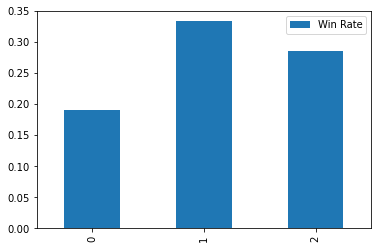

In [156]:
wins.plot(kind='bar')

# Play times

In [165]:
play_round = pd.DataFrame(columns=[
    'Player',
    'times'
])

In [166]:
play_round.loc[len(play_round)] = {
    'Player': "Bob",
    'times': len(df[df["Winner"]=="Bob"])
}
play_round.loc[len(play_round)] = {
    'Player': "Aaron",
    'times': len(df[df["Winner"]=="Aaron"])
}
play_round.loc[len(play_round)] = {
    'Player': "Yusam",
    'times': len(df[df["Winner"]=="Yusam"])
}

In [167]:
play_round

,Player,times
0,Bob,4
1,Aaron,7
2,Yusam,6


<AxesSubplot:>

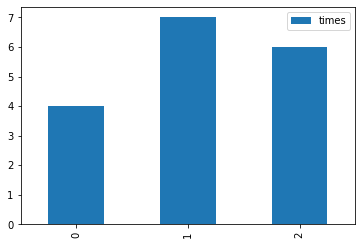

In [168]:
play_round.plot(kind='bar')

# Draw rates

In [170]:
draw_rates= pd.DataFrame(columns=[
    'Win',
    'Draw'
])

In [172]:
draw_rates.loc[len(draw_rates)] = {
    'Win': len(df)-len(df[df["Winner"]=="Draw"]),
    'Draw': len(df[df["Winner"]=="Draw"])
}

In [175]:
draw_rates

,Win,Draw
0,17,4


<AxesSubplot:>

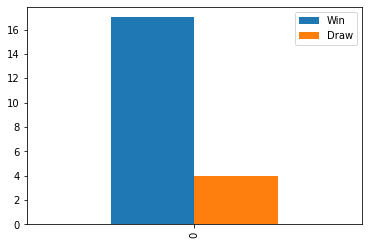

In [174]:
draw_rates.plot(kind='bar')